In [33]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import string
import os
import glob
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib
import datetime


In [64]:
fto = '/storage/experiments/2023/12_Korea_calibration/3B/0.TXT'
#fto = '/storage/experiments/2023/12_Korea_calibration/3B/1.TXT'

l=[]
l.extend(range(0,1028))
df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)#,engine='python' )
df = df.reset_index(drop=True)
sn1 = df.loc[df[0]=='$DOS'].iloc[0,6]
print("S.N.: ", sn1)
df = df.loc[df[0]=='$HIST']

S.N.:  1290c00806a20091d049a000a000003b


Text(0, 0.5, 'Counts [-]')

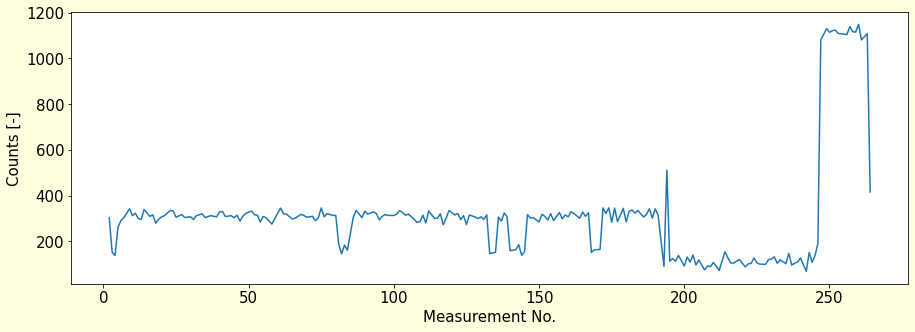

In [65]:
FIRST_CHANNEL = 8
df['sum'] = df.iloc[:,FIRST_CHANNEL:].sum(axis=1)

plt.figure(figsize=(15,5), facecolor='lightyellow')
matplotlib.rcParams.update({'font.size': 15})

plt.plot(df['sum'])
plt.xlabel('Measurement No.')
plt.ylabel('Counts [-]')


In [46]:
df.iloc[:,5:]
df

,0,1,2,3,4,5,6,7,8,9,...,1019,1020,1021,1022,1023,1024,1025,1026,1027,sum
2,$HIST,0,12.5,108.0,255,255,255,70.0,37.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0
3,$HIST,1,22.29,99.0,255,255,255,66.0,34.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,99.0
4,$HIST,2,32.55,146.0,255,255,255,76.0,50.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0
5,$HIST,3,42.80,90.0,255,255,255,62.0,28.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
6,$HIST,4,53.7,108.0,255,255,255,61.0,37.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,$HIST,85,884.63,320.0,255,255,255,118.0,49.0,118.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,320.0
207,$HIST,86,894.91,288.0,255,255,255,105.0,43.0,117.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,288.0
208,$HIST,87,905.16,301.0,255,255,255,103.0,49.0,126.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,301.0
209,$HIST,88,915.42,317.0,255,255,255,93.0,56.0,107.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,317.0


/storage/experiments/2023/12_Korea_calibration/26/0.TXT


/tmp/ipykernel_26671/363951735.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



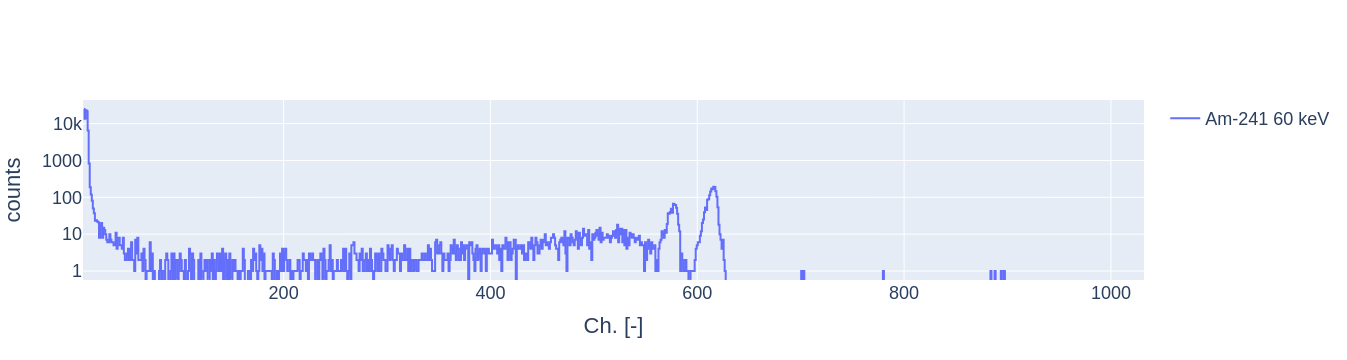

In [66]:
l=[]
l.extend(range(0,1033))

df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

rc = df.loc[df[0]=='$HIST']

rc[2] = pd.to_numeric(rc[2])

FIRST_CHANNEL = 6

ener = rc.iloc[:,FIRST_CHANNEL:1033].sum()

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
    
data = [
    go.Scatter(
        x=e3['i'],
        y=e3['1'],
        name='Am-241 60 keV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    )    
    ]

layout = go.Layout(
    #title='LABDOS',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(showlegend=True, font=dict(size=18))
fig.show()




In [63]:
rc.iloc[:,6:]

,6,7,8,9,10,11,12,13,14,15,...,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032
2,255,114.0,56.0,105.0,119.0,19.0,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,255,109.0,45.0,113.0,107.0,33.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,255,118.0,45.0,112.0,105.0,30.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
5,255,98.0,53.0,119.0,109.0,29.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


/storage/experiments/2023/12_Korea_calibration/26/0.TXT
0.06 0.0146


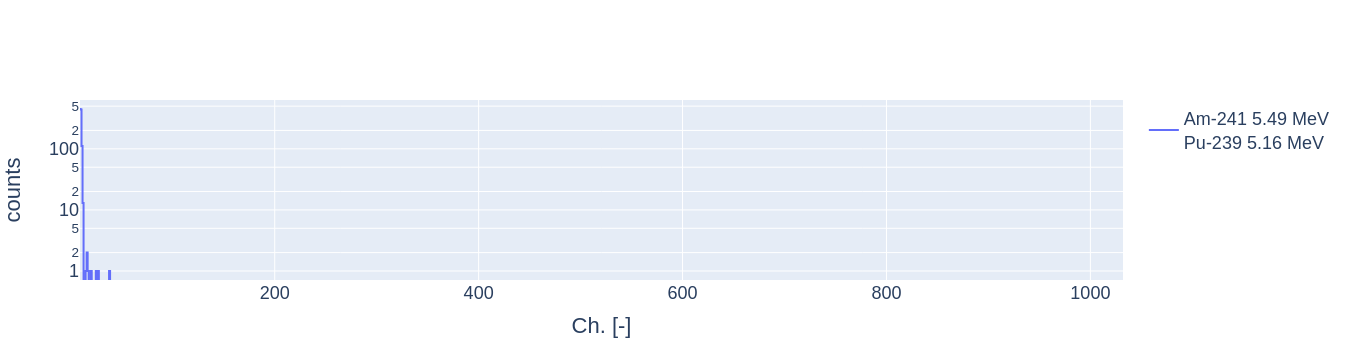

In [58]:
SWITCH_ON_TIMES = ['2023-04-24 00:00']

l=[]
l.extend(range(0,1033))

df = pd.read_csv(fto, sep=',', header=None, names=l, comment='*', low_memory=False)
df = df.reset_index(drop=True)
print(f)

df[2] = df[2].apply(pd.to_numeric, errors='coerce')

df['runtime'] = np.nan
df.loc[df[0]=='$HIST','seconds'] = df.loc[df[0]=='$HIST',2]
df.loc[df[0]=='$DOS','seconds'] = 0
df['runtime'] = df['seconds'].diff() * -1
rc = df

rc['run'] = SWITCH_ON_TIMES[0]

rc[2] = pd.to_numeric(rc[2])
rc['time'] = pd.to_datetime(rc.run) + pd.to_timedelta(rc[2], unit='s')
rc.set_index(rc['time'], drop=False, inplace=True)
#rc = rc.loc['2023-04-24 00:02:00':]

FIRST_CHANNEL = 9

ener = rc.iloc[:,FIRST_CHANNEL:1033].sum()

coef3 = np.array([0.,0.])
coef3[1] = 0.0146
coef3[0] = 0.060

#0.034 MeV + ch * 0.016 MeV

print (coef3[0], coef3[1])

e3 = pd.DataFrame()
e3['1'] = ener
e3['i'] = ener.index
e3['x'] = (e3['i'].astype(float)-FIRST_CHANNEL) * coef3[1] + coef3[0]

    
data = [
    go.Scatter(
        x=e3['i'],
        y=e3['1'],
        name='Am-241 5.49 MeV<br>Pu-239 5.16 MeV',
        yaxis='y',
        line=dict(
        shape='hvh'
        )
    )    
    ]

layout = go.Layout(
    #title='LABDOS',
    yaxis=dict(
        title='counts',
        type='log',
        #range = [0,40000]
    ),
    xaxis=dict(
        title='Ch. [-]',
    )
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(showlegend=True, font=dict(size=18))
fig.show()




In [83]:
'''
Solve the system of equations x0 + 2 * x1 = 1 and 3 * x0 + 5 * x1 = 2:

a = np.array([[1, 2], [3, 5]])
b = np.array([1, 2])
x = np.linalg.solve(a, b)
x
array([-1.,  1.])

5.157 = 332 * x + 0.134 * w
5.486 = 354 * x + 0.139 * w 


Channel width: 13 keV
Entrance window: 1.02 µm
Zero offset: Ch. 514 (from 0 to 1023)
Zero ($HIST ≔ 0): column 5 
First channel without noise ($HIST ≔ 0): column 9 
Uncertainty of zero: +26 keV
Effective channels (from the first channel without noise): 509
Device range: 6.94 + 0.5 MeV

'''
zero_culomn = 0
zero_noise_culomn = 4
maxchannel = 890
column_range = 890
A = np.array([[574, 0.134], [613, 0.139]]) # AIRDOS04A Korea s.n. 3B
A = np.array([[701, 0.134], [747, 0.139]]) # AIRDOS04A Korea s.n. 3C
A = np.array([[703, 0.134], [750, 0.139]]) # AIRDOS04A Korea s.n. C6
A = np.array([[597, 0.134], [638, 0.139]]) # AIRDOS04A Korea s.n. 38
A = np.array([[658, 0.134], [702, 0.139]]) # AIRDOS04A Korea s.n. BALON

b = np.array([5.157, 5.486])
x = np.linalg.solve(A, b)
print('Channel width:', round(x[0],4), '[MeV]')
print('Entrance window thickness:', round(x[1],2), '[\u03BCm]')
print('Pu', A[0,0], b[0], round(b[0] - A[0,1]*x[1],3))
print('Am', A[1,0], b[1], round(b[1] - A[1,1]*x[1],3))
print('Effective channels (from the first channel without noise):', column_range - (zero_noise_culomn - zero_culomn))
#print('Channels range:', maxchannel - offset)
print('Range:', round(x[0] * (maxchannel),1),'[MeV]')
#print('Range calculated from Am ch.:', round(((b[1] - A[1,1]*x[1]) / A[1,0]) * (maxchannel - offset),1),'[MeV]')
print('Energy in the 1st channel without noise:', round(x[0] * ( 1+ zero_noise_culomn - zero_culomn),3), '[MeV]')

Channel width: 0.007 [MeV]
Entrance window thickness: 4.0 [μm]
Pu 658.0 5.157 4.621
Am 702.0 5.486 4.93
Effective channels (from the first channel without noise): 886
Range: 6.3 [MeV]
Energy in the 1st channel without noise: 0.035 [MeV]
